In [1]:
#Importando as bibliotecas:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


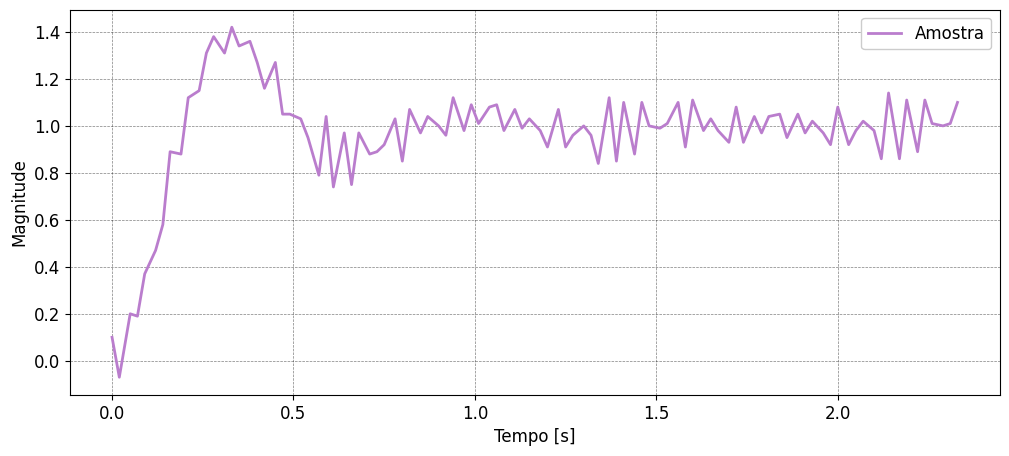

In [2]:
#Importando arquivos:
dados = np.loadtxt('Sinal1.txt')
t = np.loadtxt('Tempo1.txt')

#Amostra completa de sinal:
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure(1)
plt.plot(t, dados, color='C5', label='Amostra')
plt.ylabel('Magnitude')
plt.xlabel('Tempo [s]')
plt.legend()
plt.savefig('curves/a1.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1200x800 with 0 Axes>

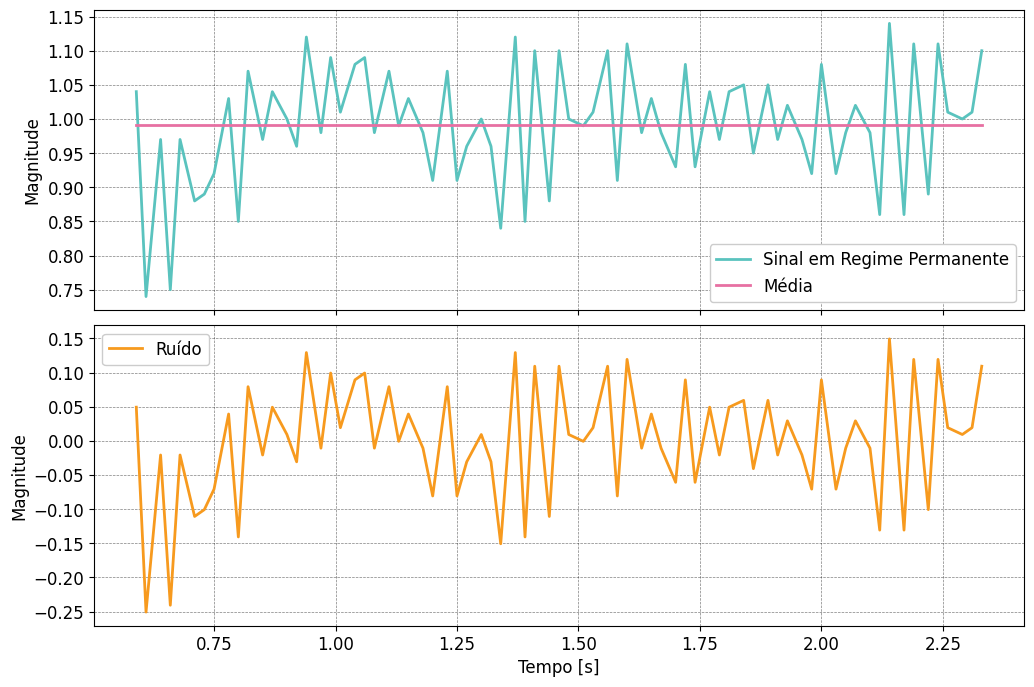

In [3]:
#Cropando o sinal após o transitório:
dados = dados[int(len(dados)/4):]
t = t[int(len(t)/4):]

#Sinal excluindo a média:
media = np.mean(dados)
sig_noise = (dados-media)

#Sinal com ruído em reginme permanente:
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure(2)
plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0.05)
plt.subplot(2, 1, 1)
plt.plot(t, dados, color='C2', label='Sinal em Regime Permanente')
plt.plot((t[0], t[-1]), (media, media), color='C1', label='Média')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, sig_noise, color='C4', label='Ruído')
plt.ylabel('Magnitude')
plt.xlabel('Tempo [s]')
plt.legend()
plt.savefig('curves/r1.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


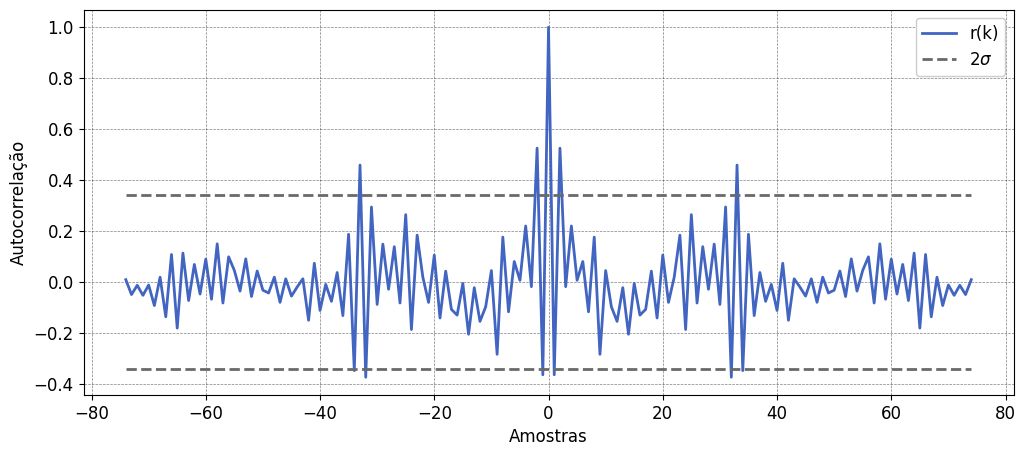

In [4]:
autcorr = signal.correlate(sig_noise, sig_noise)
autcorr /= np.max(autcorr)
sr = np.std(autcorr)
lags = signal.correlation_lags(sig_noise.size, sig_noise.size, mode="full")

#Resultado da correlação:
plt.rcParams['figure.figsize'] = (12, 5)
plt.figure(3)
plt.plot(lags, autcorr, color='C0', label='r(k)')
plt.plot(lags,(-1.96*sr)*np.ones(len(lags)), linestyle='dashed', color='C3', label='$2\sigma$')
plt.plot(lags,(+1.96*sr)*np.ones(len(lags)), linestyle='dashed', color='C3')
plt.ylabel('Autocorrelação')
plt.xlabel('Amostras')
plt.legend()
plt.savefig('curves/c1.eps', dpi=600, transparent=True, bbox_inches='tight')